In [7]:
pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import OpenDartReader
import FinanceDataReader as fdr
import mplfinance as mpf

In [9]:
api_key = '369675b178e1609ca75dedf8256c8403cfa9b2e9'
dart = OpenDartReader(api_key)

In [33]:
corp_name = '교촌에프앤비'

corp_code = dart.find_corp_code(corp_name)
print(corp_code)

00453284


In [22]:
dart_list = dart.list(corp_code, start='2023-01-01', end='2024-03-30', kind='A', final=False)

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00453284,교촌에프앤비,339770,Y,사업보고서 (2023.12),20240320001336,교촌에프앤비,20240320,연
1,00453284,교촌에프앤비,339770,Y,분기보고서 (2023.09),20231110000430,교촌에프앤비,20231110,
2,00453284,교촌에프앤비,339770,Y,반기보고서 (2023.06),20230811001807,교촌에프앤비,20230811,
3,00453284,교촌에프앤비,339770,Y,분기보고서 (2023.03),20230512001371,교촌에프앤비,20230512,
4,00453284,교촌에프앤비,339770,Y,사업보고서 (2022.12),20230322001068,교촌에프앤비,20230322,연


In [24]:
report_idx = dart_list['rcept_no'][0]

In [27]:
xml_text = dart.document(report_idx)
xml_text

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n\r\n<DOCUMENT xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="dart4.xsd">\n\n<DOCUMENT-NAME ACODE="11011">사업보고서</DOCUMENT-NAME>\n<FORMULA-VERSION SUBVER="1" ADATE="20231229">5.5</FORMULA-VERSION>\n<COMPANY-NAME AREGCIK="00453284">교촌에프앤비(주)</COMPANY-NAME>\n\n<SUMMARY>\n<EXTRACTION ACODE="LINK_FLAG" AFEATURE="BOTH">C</EXTRACTION>\n<EXTRACTION ACODE="FIN_TYPE" AFEATURE="BOTH">A</EXTRACTION>\n<EXTRACTION ACODE="IFRS_YN" AFEATURE="BOTH">Y</EXTRACTION>\n<EXTRACTION ACODE="CRP_RGS_NO_TEMP" AFEATURE="BOTH">175211-0009005</EXTRACTION>\n</SUMMARY>\n\n\n<BODY ATOCID="81">\n\n<COVER>\n<P></P>\n<COVER-TITLE ATOC="Y" AASSOCNOTE="COVER" ATOCID="1">사 업 보 고 서</COVER-TITLE>\n<P></P>\n<P USERMARK="F-16">                                    (제 25 기)</P>\n\n<TABLE-GROUP ACLASS="COVER" ADELETETABLE="N">\n\n<TABLE ACLASS="EXTRACTION" AFIXTABLE="Y" WIDTH="600" BORDER="0">\n\n<COLGROUP>\n<COL WIDTH="209"></COL>\n<COL WIDTH="153"

In [37]:
## 데이터 전처리
import re # 전처리 함수
def clean_xml(raw_xml):
    # 1. XML 태그 제거 (줄바꿈은 유지)
    clean_text = re.sub(r'<.*?>', '', raw_xml)
    
    # 2. 여러 개의 연속된 공백을 하나의 공백으로 변경 (줄바꿈은 유지)
    clean_text = re.sub(r'[ \t]+', ' ', clean_text)
    
    # 3. 줄바꿈 후 불필요한 공백 제거
    clean_text = re.sub(r'\n\s+', '\n', clean_text)
    
    # 4. 양쪽 끝의 불필요한 공백 제거
    clean_text = clean_text.strip()
    
    return clean_text



In [38]:
# XML 데이터를 정리된 텍스트로 변환
cleaned_text = clean_xml(xml_text)

# 결과 출력 또는 파일로 저장
with open(f'{corp_name}_{report_idx}.txt', 'w', encoding='utf-8') as file:
    file.write(cleaned_text)

In [39]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys

# 아래 두 코드만으로도 주식정보를 가지고 온다.
df_krx = fdr.StockListing('KRX')
df_krx.to_csv('stockList.csv', mode='w', encoding='utf-8-sig')


In [43]:
def codeFromName(name):
    nameList=list(df_krx['Name'])
    return df_krx['Code'][nameList.index(name)]

dayBfNum        = 1000
strToday        = (datetime.datetime.today()).strftime("%Y%m%d")
strFromDay      = (datetime.datetime.today()-datetime.timedelta(dayBfNum)).strftime("%Y%m%d")
strShowFromDay  = (datetime.datetime.today()-datetime.timedelta(365)).strftime("%Y%m%d")


In [44]:
print(codeFromName(corp_name))

339770


            Open  High   Low  Close  Volume    Change
Date                                                 
2023-09-25  7850  7920  7620   7660   15316 -0.024204
2023-09-26  7610  7690  7580   7610   13990 -0.006527
2023-09-27  7620  7700  7500   7650    7486  0.005256
2023-10-04  7650  7650  7450   7510    9851 -0.018301
2023-10-05  7430  7540  7360   7360   13659 -0.019973


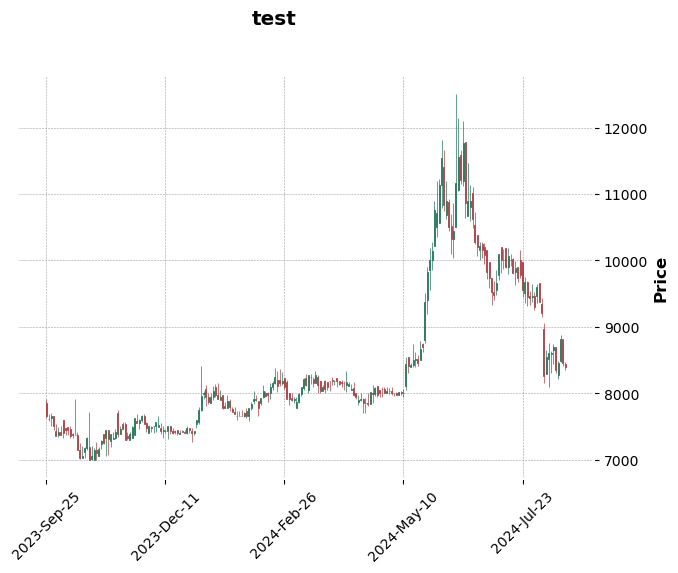

In [46]:
try:
    # 코드와 기간을 가지고 주식 가격정보를 가지고 올 수 있다니... 너무 편한데?
    data = fdr.DataReader('339770', '2023-09-23', '2024-12-31')
    print(data.head())

    mpf.plot(data, type='candle', style='charles', title="test")

except:
    print('종목 이름도 모르면 그냥 끝내야지!')
